## Polinomio de interpolación de Lagrange

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/main/2.0_Ajuste_de_curvas.ipynb)

# Ajuste de curvas

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

    valores de fi:  [6 4 5 4 3]
divisores en L(i):  [ 720.  -63.   48. -144. 1680.]

Polinomio de Lagrange, expresiones
(x - 12)*(x - 8)*(x - 6)*(x - 5)/120 - 4*(x - 12)*(x - 8)*(x - 6)*(x - 2)/63 + 5*(x - 12)*(x - 8)*(x - 5)*(x - 2)/48 - (x - 12)*(x - 6)*(x - 5)*(x - 2)/36 + (x - 8)*(x - 6)*(x - 5)*(x - 2)/560

Polinomio de Lagrange: 
29*x**4/1260 - 229*x**3/360 + 15103*x**2/2520 - 1349*x/60 + 222/7


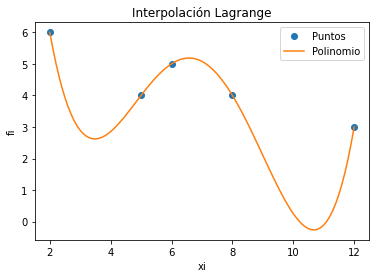

In [3]:
# Interpolacion de Lagrange
# INGRESO , Datos de prueba
xi = np.array([2, 5, 6, 8, 12])
fi = np.array([6, 4, 5, 4, 3])

# PROCEDIMIENTO
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):

    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()